In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

In [2]:
df1=pd.read_csv('Social_Network_Ads.csv')
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data Preparation and Visualisation

In [8]:
df1.shape

(400, 5)

In [10]:
df1.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df1.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df1.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [13]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df1['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

Text(0, 0.5, 'Total_Count')

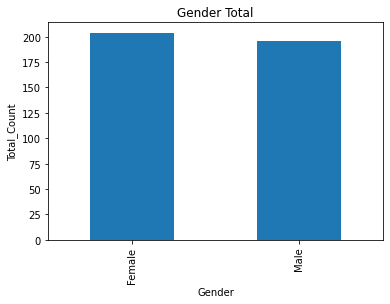

In [21]:
df1['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Total')
plt.xlabel('Gender')
plt.ylabel('Total_Count')

In [22]:
df1['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [26]:
df1['Purchased'].unique()

array([0, 1], dtype=int64)

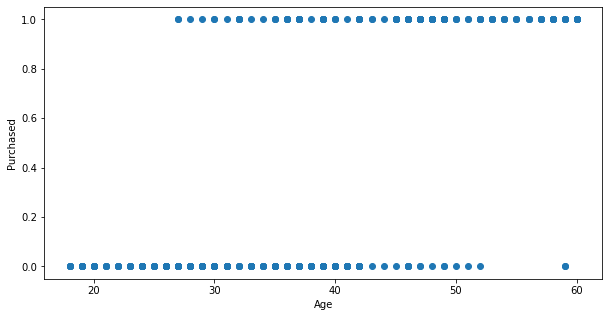

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(df1['Age'],df1['Purchased'])
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()

In [34]:
q=df1.describe()
q

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


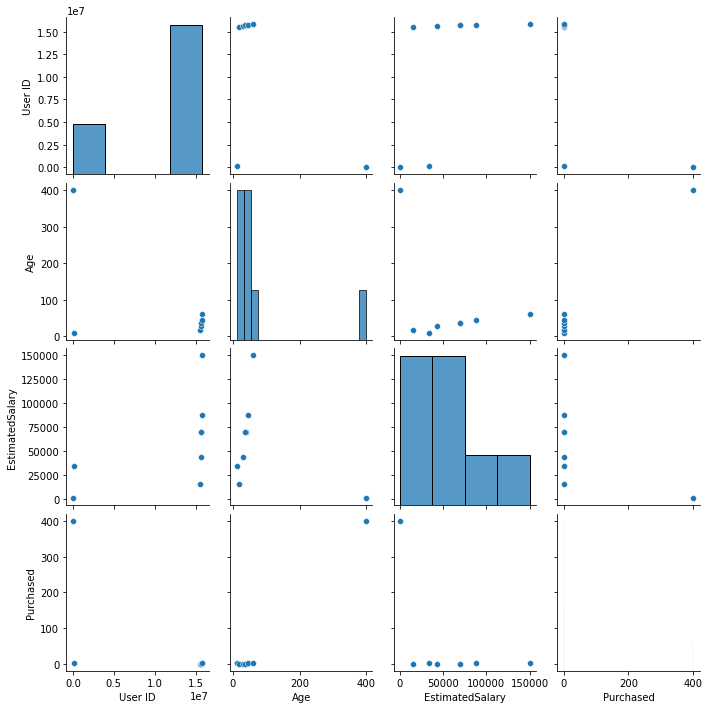

In [35]:
sns.pairplot(q)

In [36]:
df1.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

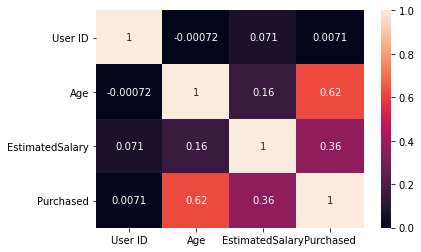

In [38]:
sns.heatmap(df1.corr(),annot=True)

# Data Modeling

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df1_new=df1.loc[:,['Gender','Age','EstimatedSalary']]
df1_new

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


# One Hot Encoding

In [43]:
df_1=pd.get_dummies(df1_new[df1_new.columns])
df_1

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [44]:
X=df_1

In [45]:
X.shape

(400, 4)

In [46]:
Y=df1['Purchased']

In [47]:
Y.shape

(400,)

# Logistic Regression Predefined Library

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [81]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

In [82]:
pd.DataFrame({'Original':Y_test,'Predict':test_pred})

,Original,Predict
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,0


In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [84]:
print(f"Test Set Accuracy:{accuracy_score(Y_test,test_pred)*100}%")

Test Set Accuracy:72.5%


In [79]:
confusion_matrix(Y_test,test_pred)

array([[54,  0],
       [26,  0]], dtype=int64)

<AxesSubplot:>

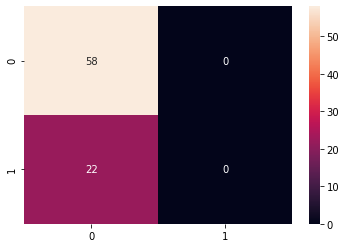

In [87]:
sns.heatmap(confusion_matrix(Y_test,test_pred),fmt='d',annot=True,xticklabels=[0,1], yticklabels=[0,1])

In [86]:
print(f"Report:\n\n{classification_report(Y_test,test_pred)}")

Report:

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



# Selecting Only One Parameters 

In [91]:
X1=df1[['Age']]
X1

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


In [90]:
df2.shape

(400, 1)

In [93]:
Y1=df1['Purchased']
Y1

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [94]:
Y1.shape

(400,)

In [95]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.20,random_state=10)

In [96]:
lr1=LogisticRegression()
lr1.fit(X1_train,Y1_train)
train_pred_1=lr1.predict(X1_train)
test_pred_1=lr1.predict(X1_test)

In [97]:
pd.DataFrame({'Origianal':Y1_test,'Predicted':test_pred_1})

,Origianal,Predicted
332,0,0
111,0,0
352,1,0
205,0,1
56,0,0
...,...,...
304,0,0
187,0,0
166,0,0
64,0,1


In [98]:
print(f"Test Set Accuracy_1:{accuracy_score(Y1_test,test_pred_1)*100}%")

Test Set Accuracy_1:85.0%


In [99]:
confusion_matrix(Y1_test,test_pred_1)

array([[48,  4],
       [ 8, 20]], dtype=int64)

<AxesSubplot:>

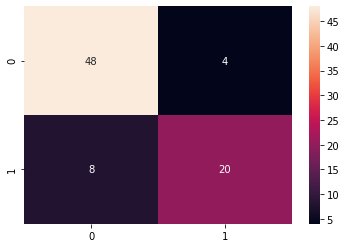

In [100]:
sns.heatmap(confusion_matrix(Y1_test,test_pred_1),fmt='d',annot=True,xticklabels=[0,1], yticklabels=[0,1])

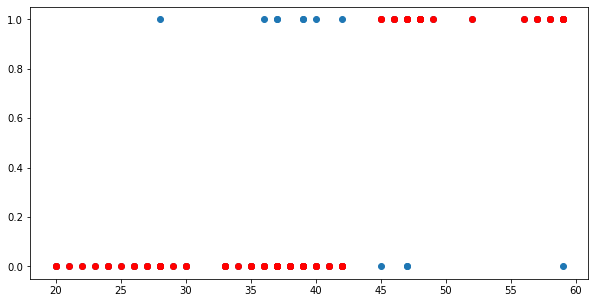

In [104]:
plt.figure(figsize=(10,5))
plt.scatter(X1_test, Y1_test)
plt.scatter(X1_test, test_pred_1, c="red")
plt.show()

In [101]:
print(f"Report_1:\n\n{classification_report(Y1_test,test_pred_1)}")

Report_1:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.83      0.71      0.77        28

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80

